In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

import yfinance as yf

from sklearn.linear_model import LinearRegression

### Get a sample stock price from 2019-01-01 to today

In [2]:
# Get the data of the Apple stock (code AAPL)
data = yf.download('AAPL','2019-01-01','2020-04-30')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,158.529999,159.360001,156.479996,157.740005,154.618546,35003500
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800


### Extract the Close price column to plot

In [3]:
df = pd.DataFrame(data, columns=['Close'])
df = df.reset_index()
df.isna().values.any() # check for NaN

False

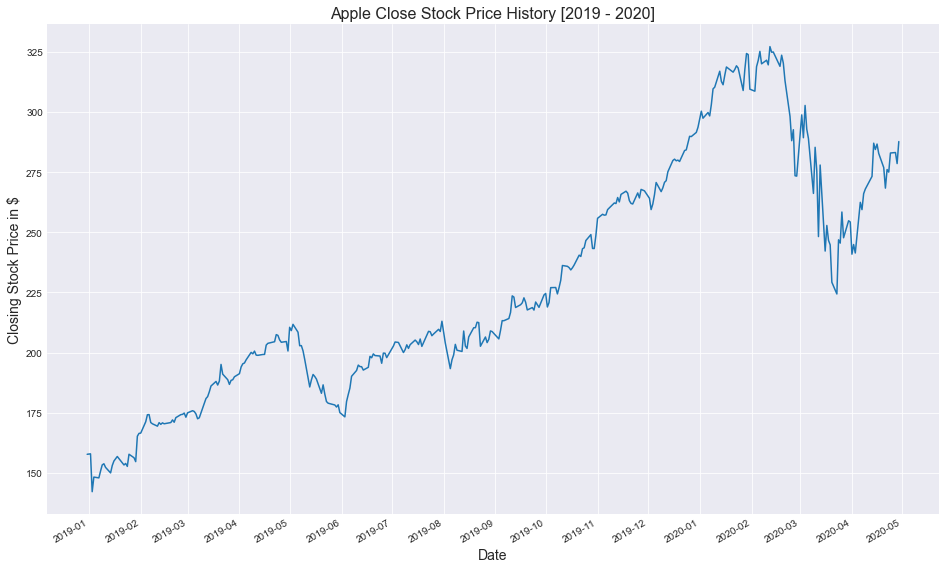

In [4]:
# Import matplotlib package for date plots

months = mdates.MonthLocator() # Get every year
dateFmt = mdates.DateFormatter('%Y-%m') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(dateFmt)

# Set figure title
plt.title('Apple Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

### Get stock of Apple, Google, Microsoft, Amazon, Facebook via Yahoo Finance

In [5]:
def get_close_stock_price(codes, start_date, end_date):
    data = { code : yf.download(code, start_date, end_date) for code in codes }
    data = { key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items() }
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

In [6]:
df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'],'2019-03-01', '2019-04-01')
df.to_csv('close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
df = pd.read_csv('close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-02-28,173.149994,1126.550049,112.029999,1639.829956,161.449997
2019-03-01,174.970001,1148.520020,112.529999,1671.729980,162.279999
2019-03-04,175.850006,1153.420044,112.260002,1696.170044,167.369995
2019-03-05,175.529999,1169.189941,111.699997,1692.430054,171.259995
2019-03-06,174.520004,1164.939941,111.750000,1668.949951,172.509995


In [8]:
df.index

DatetimeIndex(['2019-02-28', '2019-03-01', '2019-03-04', '2019-03-05',
               '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-11',
               '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15',
               '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
               '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28', '2019-03-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

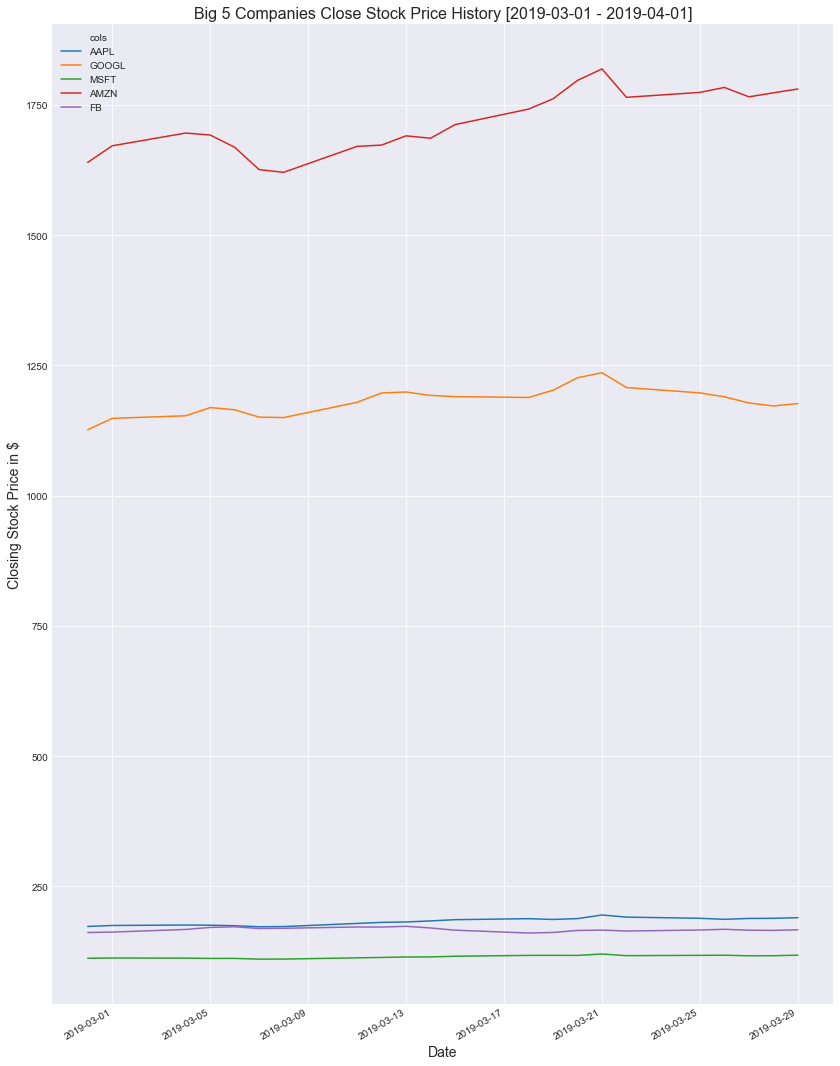

In [10]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(14,20))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019-03-01 - 2019-04-01]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [11]:
df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'],'2020-01-01', '2020-02-01')
df.to_csv('close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df = pd.read_csv('close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2019-12-31,293.649994,1339.390015,157.699997,1847.839966,205.250000
2020-01-02,300.350006,1368.680054,160.619995,1898.010010,209.779999
2020-01-03,297.429993,1361.520020,158.619995,1874.969971,208.669998
2020-01-06,299.799988,1397.810059,159.029999,1902.880005,212.600006
2020-01-07,298.390015,1395.109985,157.580002,1906.859985,213.059998


In [13]:
df.index

DatetimeIndex(['2019-12-31', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

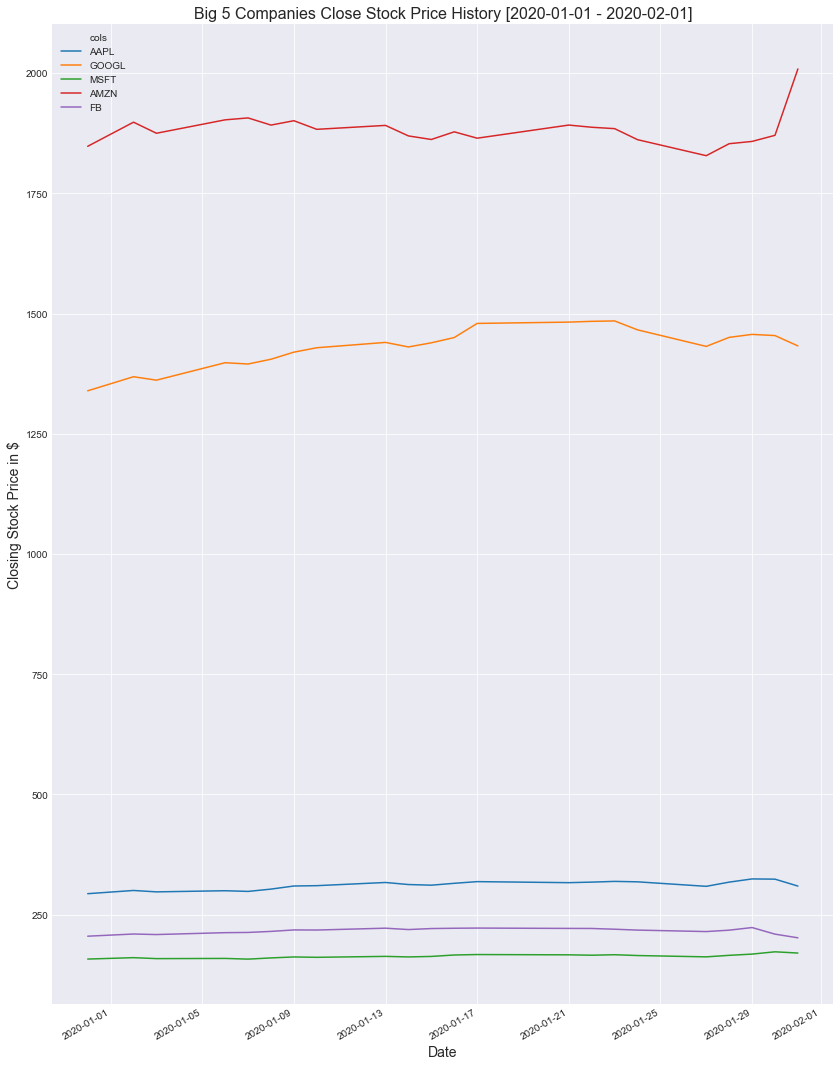

In [15]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(14,20))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2020-01-01 - 2020-02-01]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [16]:
df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'], '2019-01-01', '2020-04-30')
df.to_csv('close_price_big_5.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
df = pd.read_csv('close_price_big_5.csv', index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])
df.head()

,AAPL,GOOGL,MSFT,AMZN,FB
Date,,,,,
2018-12-31,157.740005,1044.959961,101.570000,1501.969971,131.089996
2019-01-02,157.919998,1054.680054,101.120003,1539.130005,135.679993
2019-01-03,142.190002,1025.469971,97.400002,1500.280029,131.740005
2019-01-04,148.259995,1078.069946,101.930000,1575.390015,137.949997
2019-01-07,147.929993,1075.920044,102.059998,1629.510010,138.050003


In [18]:
df.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', name='Date', length=335, freq=None)

In [19]:
df_plot = df.reset_index().melt('Date', var_name='cols',  value_name='vals')
df_plot.isna().values.any()

False

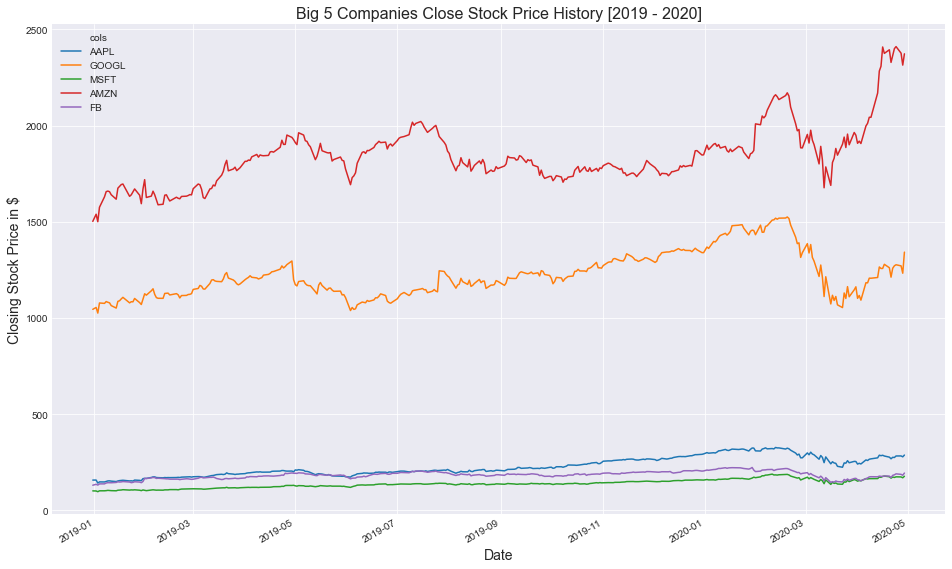

In [20]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="Date", y="vals", hue='cols', data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Big 5 Companies Close Stock Price History [2019 - 2020]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [21]:
# decribe include mean, std (standard deviation)
df.describe()

,AAPL,GOOGL,MSFT,AMZN,FB
count,335.000000,335.000000,335.000000,335.000000,335.000000
mean,227.769253,1223.116387,138.878508,1840.965998,183.745254
std,47.946443,114.380678,20.908239,156.999103,18.904010
min,142.190002,1025.469971,97.400002,1500.280029,131.089996
25%,193.614998,1136.264954,125.225002,1752.950012,171.209999
50%,211.750000,1205.540039,137.520004,1820.550049,185.369995
75%,266.230011,1291.224976,152.215004,1902.539978,196.419998
max,327.200012,1524.869995,188.699997,2410.219971,223.229996


In [22]:
df[['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB']].corr()

,AAPL,GOOGL,MSFT,AMZN,FB
AAPL,1.000000,0.875474,0.945812,0.554473,0.696028
GOOGL,0.875474,1.000000,0.773780,0.399231,0.772271
MSFT,0.945812,0.773780,1.000000,0.723971,0.689732
AMZN,0.554473,0.399231,0.723971,1.000000,0.455029
FB,0.696028,0.772271,0.689732,0.455029,1.000000


<p>Các công ty cùng tăng, cùng giảm.</p>
<p>Google-Amazon, Apple-Amazon, Facebook-Amazon có hệ số tương quan vừa phải, còn lại là có hệ số tương quan mạnh.</p>

### Create X, y matrices for regression
Use history = number of days before prediction date

In [23]:
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( df.iloc[row_idx-history:row_idx,:].values.reshape(-1) )
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

### Create a Linear Regression Model to predict stock price

In [24]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

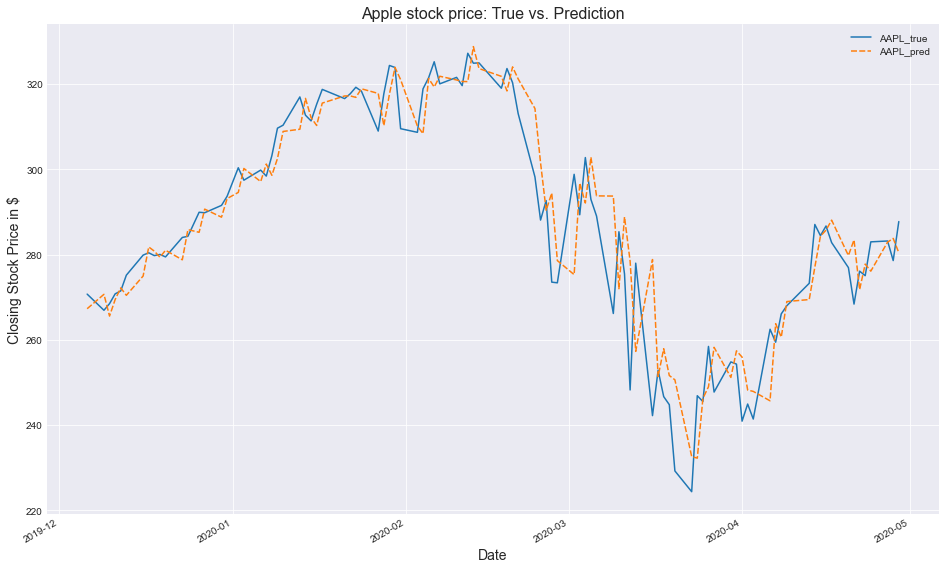

In [25]:
df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Apple stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

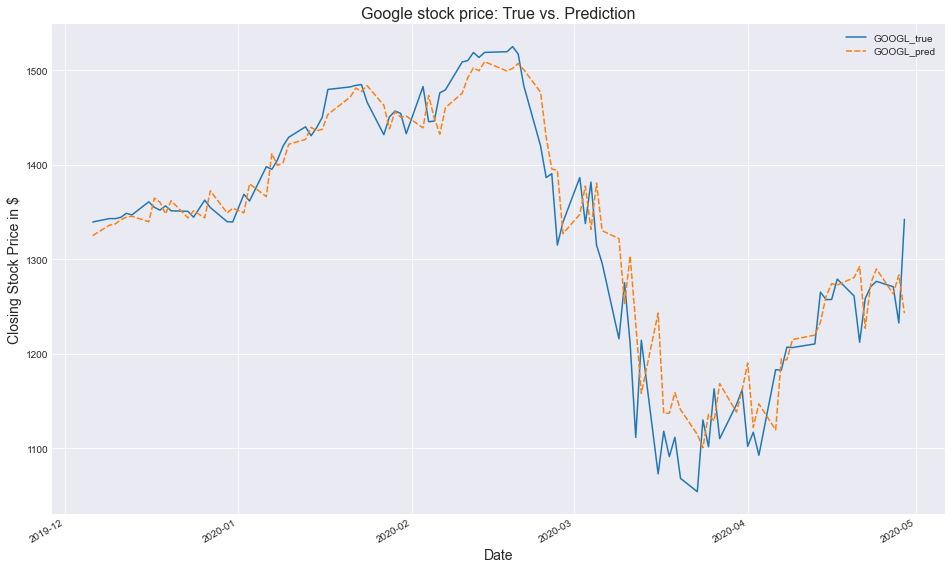

In [26]:
df_plot = pd.DataFrame({"GOOGL_true": y_test[:,1], 'GOOGL_pred': ypred[:,1]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Google stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

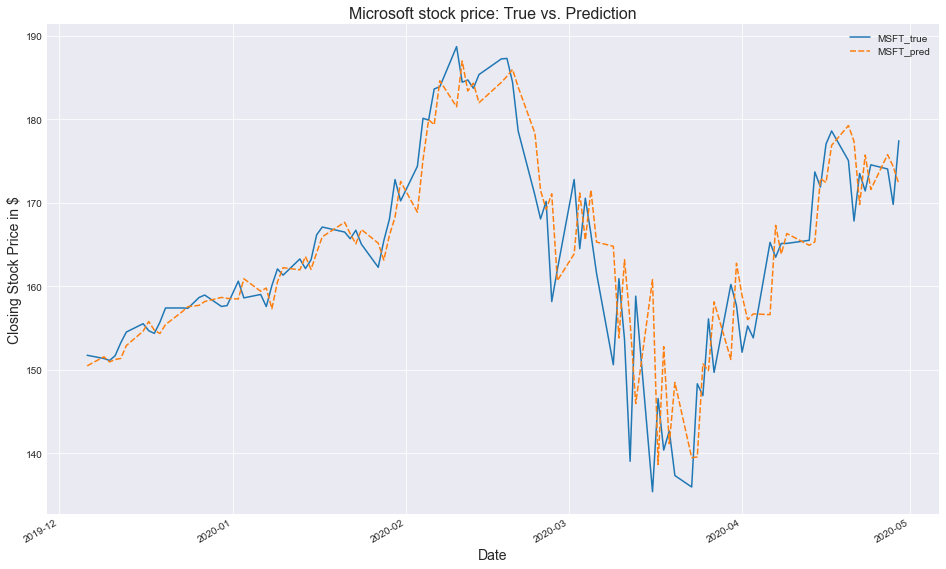

In [27]:
df_plot = pd.DataFrame({"MSFT_true": y_test[:,2], 'MSFT_pred': ypred[:,2]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Microsoft stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

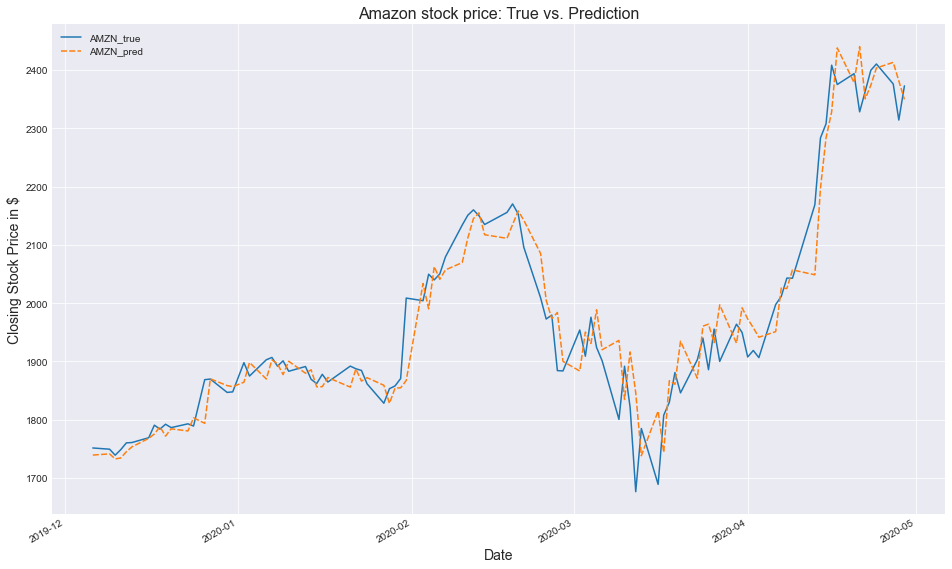

In [28]:
df_plot = pd.DataFrame({"AMZN_true": y_test[:,3], 'AMZN_pred': ypred[:,3]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Amazon stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

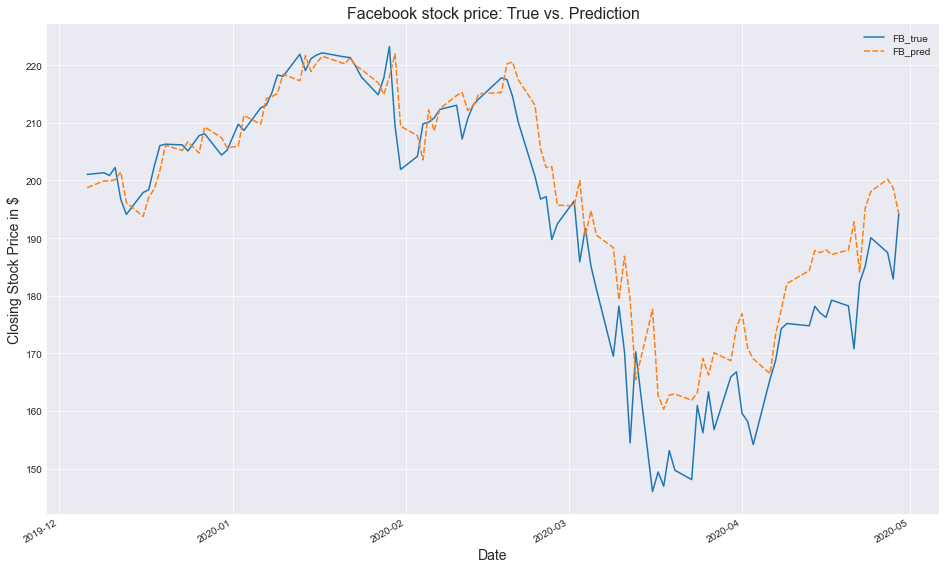

In [29]:
df_plot = pd.DataFrame({"FB_true": y_test[:,4], 'FB_pred': ypred[:,4]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Facebook stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

<h3>Model Evaluation</h3>

In [30]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 

for i in range(5):
    print( df.columns[i], ":", mean_absolute_error(y_test[:,i], ypred[:,i]))

AAPL : 6.522741546220686
GOOGL : 28.021584375524146
MSFT : 3.974028500003875
AMZN : 37.05856278632478
FB : 6.185909122150111


In [31]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

for i in range(5):
    print( df.columns[i], ":", mean_squared_error(y_test[:,i], ypred[:,i]))

AAPL : 89.4976926810035
GOOGL : 1645.4464193838205
MSFT : 32.90810356337815
AMZN : 2600.668333379297
FB : 75.02953043306724


In [32]:
#Root Mean Squared Error
for i in range(5):
    print( df.columns[i], ":", np.sqrt(mean_squared_error(y_test[:,i], ypred[:,i])))

AAPL : 9.460322017828119
GOOGL : 40.56410259556866
MSFT : 5.736558512155014
AMZN : 50.996748262799045
FB : 8.66195881040006


In [33]:
#Mean Relative Error
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

for i in range(5):
    print( df.columns[i], ":", mean_relative_error(y_test[:,i], ypred[:,i]))   

AAPL : 0.023742586199156576
GOOGL : 0.02240810755686605
MSFT : 0.025071273441418324
AMZN : 0.01891686162322997
FB : 0.03525891105180437


# Exercise
1. Play with the above code to get familiar with stock price data and ways to create training data ( X = past stock price, y = future stock price )
2. Investigate if stock price of Big 5 companies are related to each other ( “FAAMG”—Facebook, Amazon, Apple, Microsoft, and Google )
3. Determine the features that could predict future stock price ( stock price from Yahoo Finance could be considered as raw features, create new features if needed )
4. Build a linear regression model to predict future stock price
5. Evaluate your model performance

<h3>Build a linear regression model to predict future stock price</h3>

In [42]:
# get stock of Apple, Google, Micro, Amazon, FB via Yahoo Finance
def get_close_stock_price(codes, start_date='2018-01-01', end_date='2020-05-14'):
    data = {code : yf.download(code, start_date, end_date) for code in codes }
    data = {key : pd.DataFrame(value, columns=['Close']).rename(columns={'Close': f'{key}'}) for key, value in data.items()}
    df = None
    for key, value in data.items():
        if df is None:
            df = value
        else:
            df = df.merge(value, left_index=True, right_index=True)
    return df

df = get_close_stock_price(['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
import math 
def get_feature(raw_df):
    return np.power(raw_df,2).values.reshape(-1)
def create_Xy(df, history=1):
    '''df has index as date
    columns are stock price of the companies
    '''
    X, y, dates = [], [], []
    for row_idx in range(history, len(df)):
        y.append( df.iloc[row_idx,:].values.reshape(-1) )
        X.append( get_feature(df.iloc[row_idx-history:row_idx,:]))
        dates.append(df.index[row_idx])
    X, y = np.array(X), np.array(y)
    return X, y, dates

X,y,dates = create_Xy(df, history=5)
# use 7/10 of the dataset to train (use past price to predict future price)
n_train = len(y) * 7 // 10
X_train, y_train, dates_train, X_test, y_test, dates_test = X[:n_train], y[:n_train], dates[:n_train], X[n_train:], y[n_train:], dates[n_train:]

In [44]:
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_test)

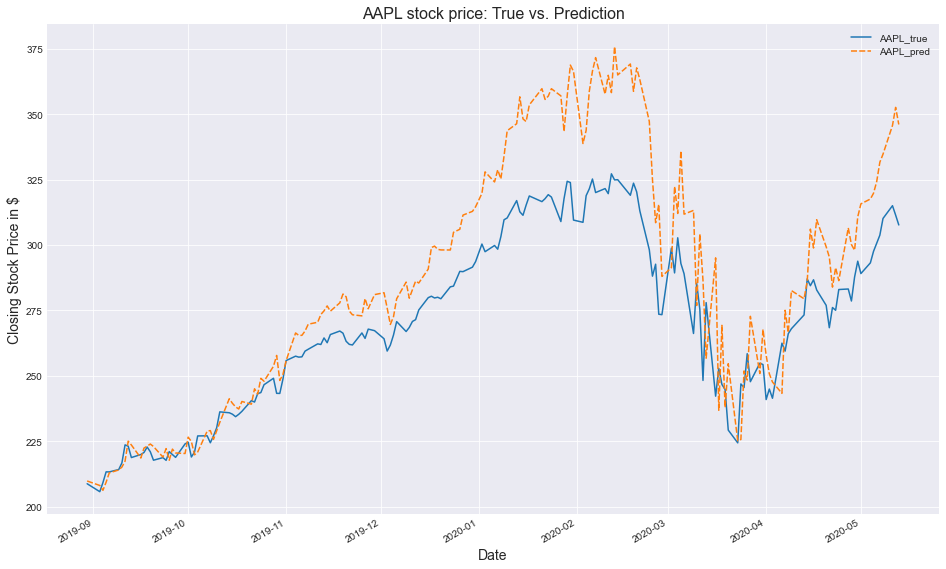

In [45]:
df_plot = pd.DataFrame({"AAPL_true": y_test[:,0], 'AAPL_pred': ypred[:,0]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('AAPL stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

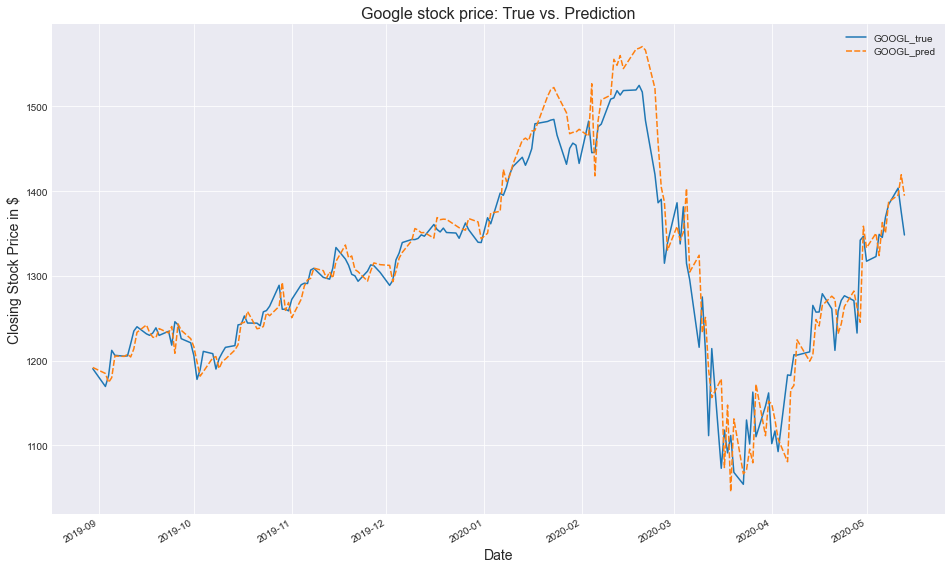

In [46]:
df_plot = pd.DataFrame({"GOOGL_true": y_test[:,1], 'GOOGL_pred': ypred[:,1]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Google stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

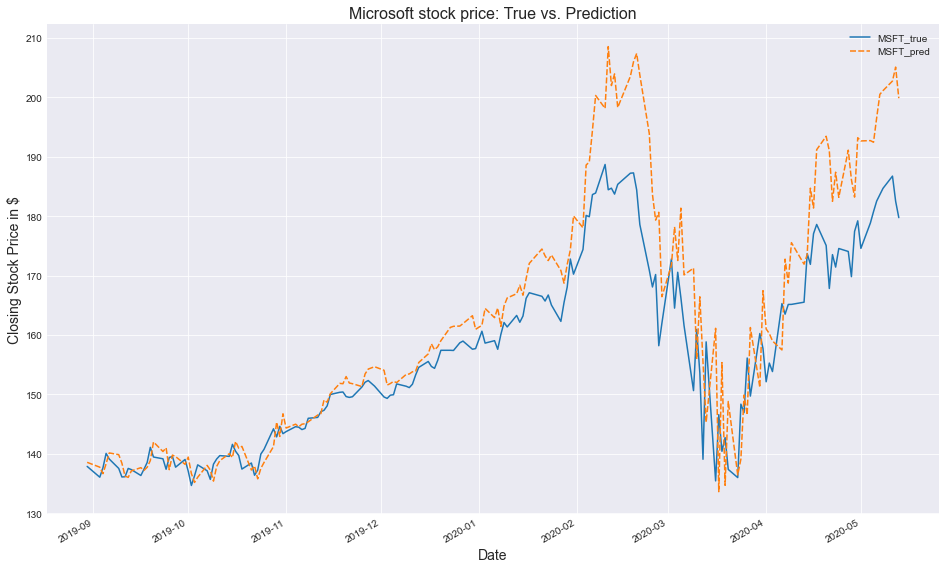

In [47]:
df_plot = pd.DataFrame({"MSFT_true": y_test[:,2], 'MSFT_pred': ypred[:,2]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Microsoft stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

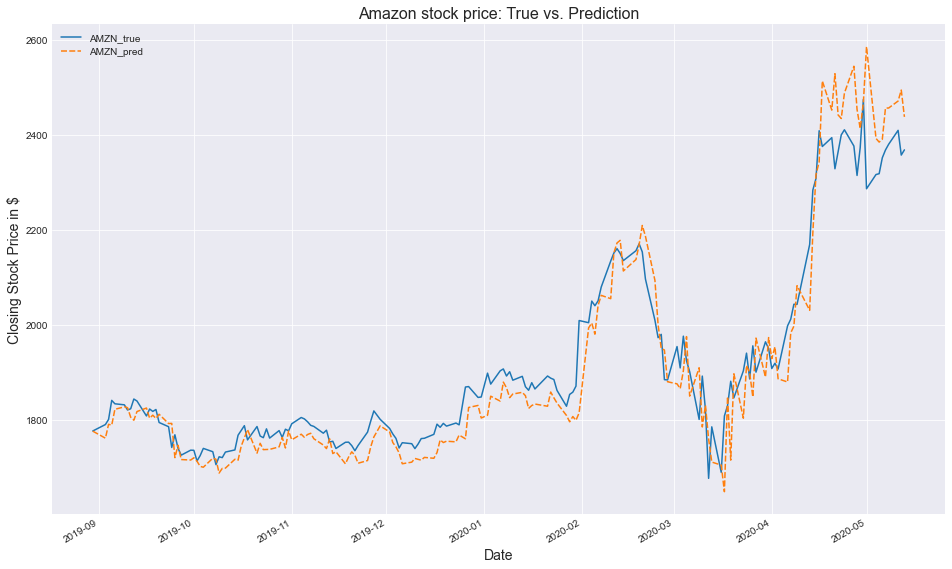

In [48]:
df_plot = pd.DataFrame({"AMZN_true": y_test[:,3], 'AMZN_pred': ypred[:,3]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Amazon stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

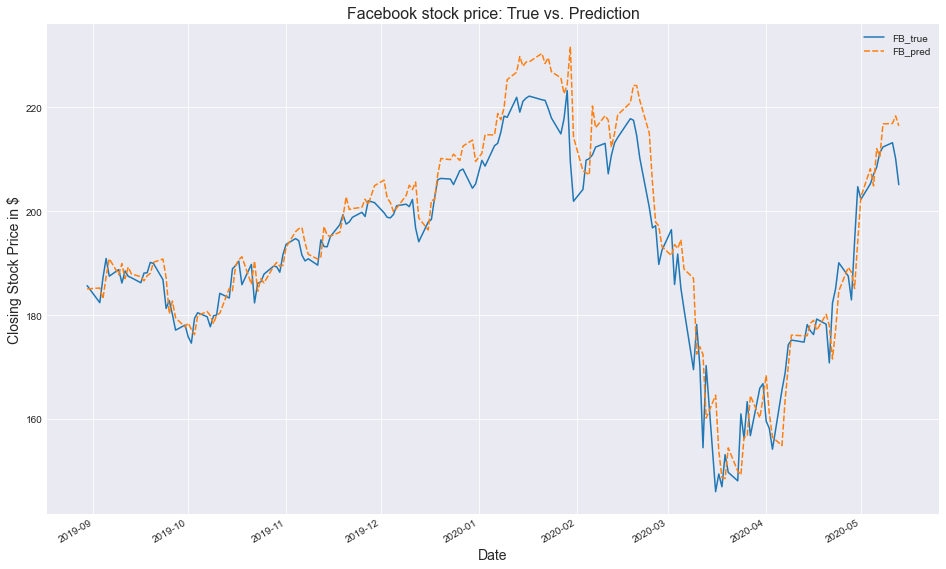

In [49]:
df_plot = pd.DataFrame({"FB_true": y_test[:,4], 'FB_pred': ypred[:,4]}, index=dates_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('Facebook stock price: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

<h3>Model Evaluation</h3>

In [50]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error 

for i in range(5):
    print( df.columns[i], ":", mean_absolute_error(y_test[:,i], ypred[:,i]))

AAPL : 17.790070291680262
GOOGL : 23.577096045067023
MSFT : 6.470216152017759
AMZN : 45.33928570065645
FB : 4.347375245120399


In [51]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

for i in range(5):
    print( df.columns[i], ":", mean_squared_error(y_test[:,i], ypred[:,i]))

AAPL : 529.2929707270168
GOOGL : 1112.5441265953532
MSFT : 84.90868997687767
AMZN : 3813.0393835953014
FB : 33.86185434145215


In [52]:
#Root Mean Squared Error
for i in range(5):
    print( df.columns[i], ":", np.sqrt(mean_squared_error(y_test[:,i], ypred[:,i])))

AAPL : 23.006368047282404
GOOGL : 33.35482163938751
MSFT : 9.214591145399652
AMZN : 61.74981282235033
FB : 5.819093945061564


In [53]:
#Mean Relative Error
def mean_relative_error(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

for i in range(5):
    print( df.columns[i], ":", mean_relative_error(y_test[:,i], ypred[:,i]))   

AAPL : 0.06181420158670517
GOOGL : 0.01833802939563737
MSFT : 0.0392963106690769
AMZN : 0.023012445815671655
FB : 0.022878344244253543
